<a href="https://colab.research.google.com/github/Prinxcharmy/Predictive-Data-Analysis-for-SME-Customer-Relationship-Management/blob/main/Predictive_Data_Analysis_for_SME_Customer_Relationship_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from os import pipe

## Load the  dataset

In [2]:
# upload files
from google.colab import files
uploaded = files.upload()

Saving DatAI.xlsx to DatAI.xlsx


In [3]:
df = pd.read_excel('DatAI.xlsx')
print(df.head())

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
print(df.describe())

         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min     

## Handling Missing Value

In [6]:
# Check for missing values
print('Missing Values')
print(df.isnull().sum())

Missing Values
CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [7]:
print("\nPercentage of missing values per column:")
print((df.isnull().sum() / len(df)) * 100)


Percentage of missing values per column:
CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64


In [8]:
# Fill missing values with median in the numerical column
for column in df.select_dtypes(include=['number']).columns:
  if df[column].isnull().any():
    df.fillna(df[column].median(), inplace=True)

In [9]:
# Confirm transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## Check for Duplicates

In [10]:
# Identify and remove any duplicate records
print(df.duplicated().sum())

0


In [11]:
print("\n--- Descriptive Statistics ---")
print(df.describe())


--- Descriptive Statistics ---
         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5630.000000  5630.000000      5630.000000   
mean   52815.500000     0.168384    10.134103     1.654707        15.343872   
std     1625.385339     0.374240     8.357951     0.915389         8.450963   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     3.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        13.000000   
75%    54222.750000     0.000000    15.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5630.000000               5630.000000        5630.000000   
mean         3.206394                  3.688988           3.066785   
std          1.445779                  1.02399

## Visualisation

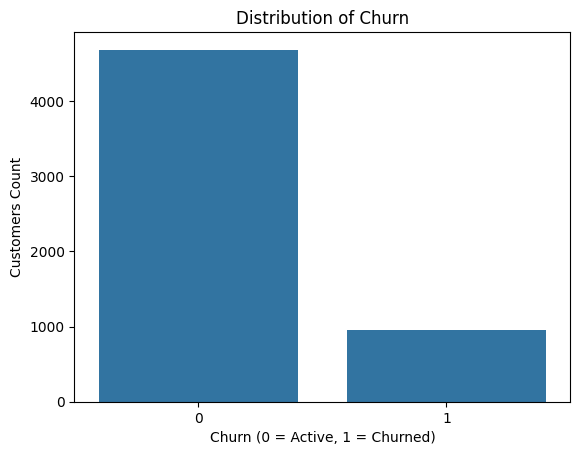

In [12]:
# create a countplot with seaborn
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel("Churn (0 = Active, 1 = Churned)")
plt.ylabel("Customers Count")
plt.show()

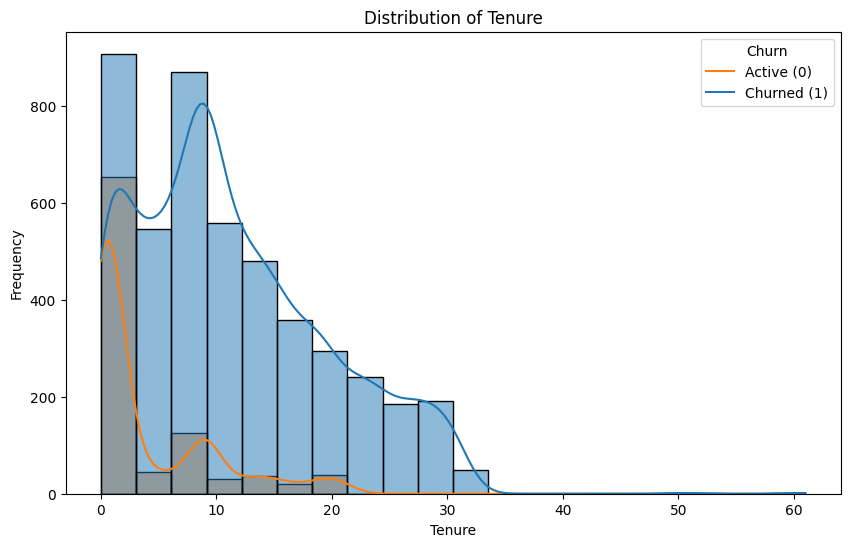

In [13]:
# Tenure distribution by tenure
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tenure', hue='Churn', bins=20, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend(title='Churn', labels=['Active (0)', 'Churned (1)'])
plt.show()

/tmp/ipython-input-14-3396267704.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_churn = df.groupby(['DeliveryBin', 'Churn']).size().unstack(fill_value=0)


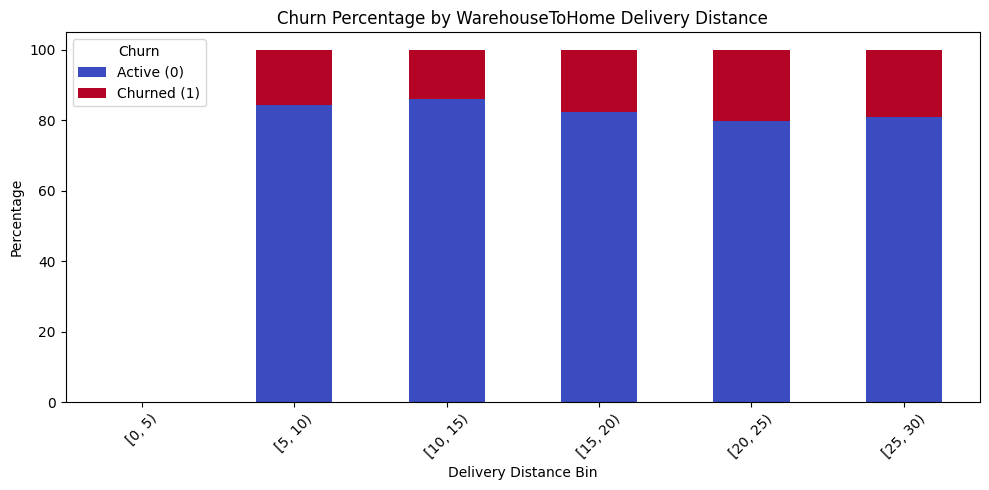

In [14]:
# Bin WarehouseToHome
df['DeliveryBin'] = pd.cut(df['WarehouseToHome'], bins=[0, 5, 10, 15, 20, 25, 30], right=False)

# Group and calculate churn % per bin
delivery_churn = df.groupby(['DeliveryBin', 'Churn']).size().unstack(fill_value=0)
delivery_churn_percent = delivery_churn.div(delivery_churn.sum(axis=1), axis=0) * 100

# Plot
delivery_churn_percent.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='coolwarm')
plt.title('Churn Percentage by WarehouseToHome Delivery Distance')
plt.xlabel('Delivery Distance Bin')
plt.ylabel('Percentage')
plt.legend(title='Churn', labels=['Active (0)', 'Churned (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CustomerID                   5630 non-null   int64   
 1   Churn                        5630 non-null   int64   
 2   Tenure                       5630 non-null   float64 
 3   PreferredLoginDevice         5630 non-null   object  
 4   CityTier                     5630 non-null   int64   
 5   WarehouseToHome              5630 non-null   float64 
 6   PreferredPaymentMode         5630 non-null   object  
 7   Gender                       5630 non-null   object  
 8   HourSpendOnApp               5630 non-null   float64 
 9   NumberOfDeviceRegistered     5630 non-null   int64   
 10  PreferedOrderCat             5630 non-null   object  
 11  SatisfactionScore            5630 non-null   int64   
 12  MaritalStatus                5630 non-null   object  
 13  Num

In [16]:
# Select features for clustering (exclude CustomerID and Churn)
features_for_clustering = [
    'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
    'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
    'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
    'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
    'DaySinceLastOrder', 'CashbackAmount'
]

In [17]:
df_clustering = df[features_for_clustering].copy()
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       5630 non-null   float64
 1   PreferredLoginDevice         5630 non-null   object 
 2   CityTier                     5630 non-null   int64  
 3   WarehouseToHome              5630 non-null   float64
 4   PreferredPaymentMode         5630 non-null   object 
 5   Gender                       5630 non-null   object 
 6   HourSpendOnApp               5630 non-null   float64
 7   NumberOfDeviceRegistered     5630 non-null   int64  
 8   PreferedOrderCat             5630 non-null   object 
 9   SatisfactionScore            5630 non-null   int64  
 10  MaritalStatus                5630 non-null   object 
 11  NumberOfAddress              5630 non-null   int64  
 12  Complain                     5630 non-null   int64  
 13  OrderAmountHikeFro

## Customer Categorization (Clustering)

K-Means clustering to segment customers based on various behavioral and demographic attributes

Text(0, 0.5, 'Inertia')

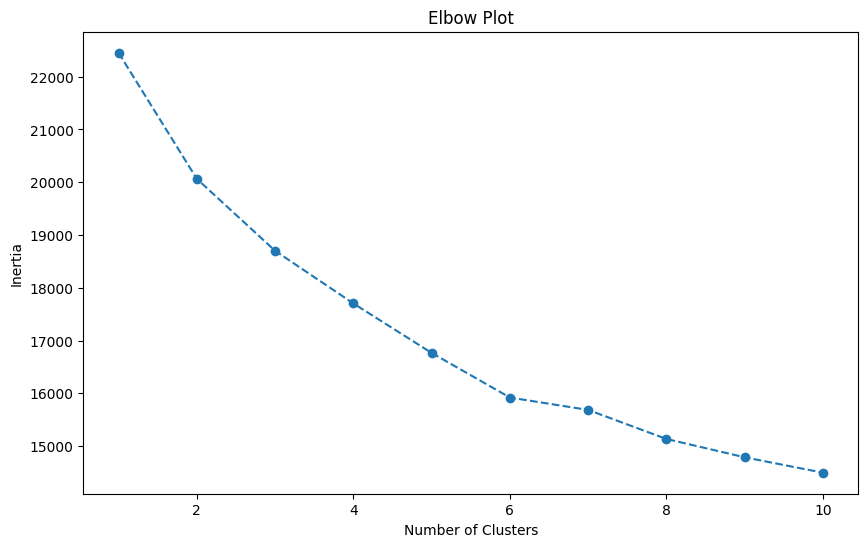

In [18]:
# Identify numerical and categorical columns for preprocessing
numerical_columns = df_clustering.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df_clustering.select_dtypes(include=['object']).columns.tolist()

# Create a preprocessor for scaling numerical and one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Apply preprocessing
clustered_scale = preprocessor.fit_transform(df_clustering)


# Determine optimal number of clusters using the Elbow Method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(clustered_scale)
    inertia.append(kmeans.inertia_)

# Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [19]:
# Based on the Elbow plot, k = 4
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(clustered_scale)

#Analyse the clusters
print(f"\n--- Customer Segmentation Analysis (K={k_optimal}) ---")
cluster_summary = df.groupby('Cluster').agg(
    # Numerical features
    Tenure_mean = ('Tenure', 'mean'),
    WarehouseToHome_mean = ('WarehouseToHome', 'mean'),
    HourSpendOnApp_mean = ('HourSpendOnApp', 'mean'),
    SatisfactionScore_mean = ('SatisfactionScore', 'mean'),
    NumberOfDeviceRegistered_mean = ('NumberOfDeviceRegistered', 'mean'),
    OrderAmountHikeFromlastYear_mean = ('OrderAmountHikeFromlastYear', 'mean'),
    CouponUsed_mean = ('CouponUsed', 'mean'),
    OrderCount_mean = ('OrderCount', 'mean'),
    DaySinceLastOrder_mean = ('DaySinceLastOrder', 'mean'),
    CashbackAmount_mean = ('CashbackAmount', 'mean'),
    Complain_rate = ('Complain', 'mean'),
    Churn_rate = ('Churn', 'mean'),
    # Categorical features
    MostCommonDevice = ('PreferredLoginDevice', lambda x: x.mode()[0]),
    MostCommonPayment = ('PreferredPaymentMode', lambda x: x.mode()[0]),
    MostCommonOrderCategory = ('PreferedOrderCat', lambda x: x.mode()[0]),
    count = ('CustomerID', 'count')
).round(2)
print(cluster_summary)


--- Customer Segmentation Analysis (K=4) ---
         Tenure_mean  WarehouseToHome_mean  HourSpendOnApp_mean  \
Cluster                                                           
0               7.16                 14.34                 3.62   
1              11.43                 15.83                 3.03   
2               9.60                 15.64                 3.19   
3              12.25                 15.33                 3.05   

         SatisfactionScore_mean  NumberOfDeviceRegistered_mean  \
Cluster                                                          
0                          3.19                           3.39   
1                          3.04                           3.75   
2                          2.99                           3.72   
3                          3.08                           3.87   

         OrderAmountHikeFromlastYear_mean  CouponUsed_mean  OrderCount_mean  \
Cluster                                                                    

## Visualization of the Cluster

We use Principal Component Analysis (PCA) to reduce the dimensionality of the data to 2 components and then plot the clusters in a 2D scatter plot.

The customer clusters have been visualized using PCA. The next step is to interpret the characteristics of each cluster to understand the different customer segments. We can do this by analyzing the cluster_summary DataFrame we created earlier.



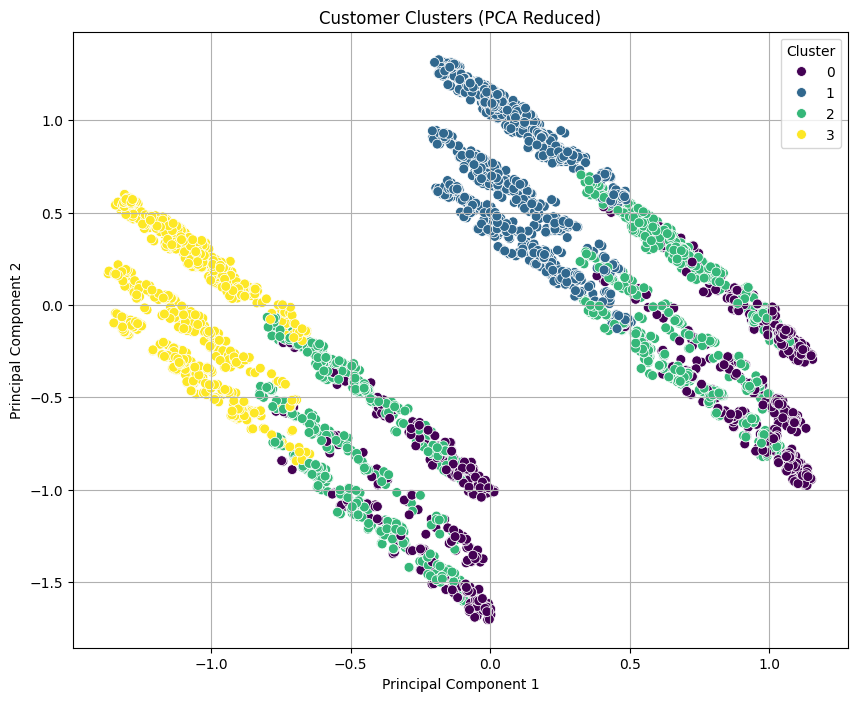

In [20]:
# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
clustered_pca = pca.fit_transform(clustered_scale)

# Create a DataFrame with PCA results and cluster assignments
pca_df = pd.DataFrame(data=clustered_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']

# Visualize the clusters in a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=50)
plt.title('Customer Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [21]:
# Iterate through the cluster summary to print characteristics for each cluster

print(f"\n--- Clusters Summary ---")

for cluster_number, row in cluster_summary.iterrows():
    tenure = row['Tenure_mean']
    satisfaction = row['SatisfactionScore_mean']
    complain_rate = row['Complain_rate']
    churn_rate = row['Churn_rate']
    order_count = row['OrderCount_mean']

    print(f"Cluster {int(cluster_number)} Characteristics:")
    print(f"  Average Tenure: {tenure:.2f}")
    print(f"  Average Satisfaction Score: {satisfaction:.2f}")
    print(f"  Complain Rate: {complain_rate:.2f}")
    print(f"  Churn Rate: {churn_rate:.2f}")
    print(f"  Average Order Count: {order_count:.2f}")

    # Analyze based on the metrics to identify potential customer segments
    if tenure > 10 and satisfaction > 3 and churn_rate < 0.15:
        print("  Segment: Loyal Customers (High Tenure, High Satisfaction, Low Churn)")
    elif satisfaction < 3 and complain_rate > 0.3 and churn_rate > 0.2:
        print("  Segment: At-Risk Customers (Low Satisfaction, High Complain Rate, High Churn)")
    elif churn_rate < 0.15 and order_count > 3:
        print("  Segment: Engaged Customers (Low Churn, High Order Count)")
    else:
        print("  Segment: Other")
    print("-" * 30)


--- Clusters Summary ---
Cluster 0 Characteristics:
  Average Tenure: 7.16
  Average Satisfaction Score: 3.19
  Complain Rate: 0.29
  Churn Rate: 0.22
  Average Order Count: 2.00
  Segment: Other
------------------------------
Cluster 1 Characteristics:
  Average Tenure: 11.43
  Average Satisfaction Score: 3.04
  Complain Rate: 0.27
  Churn Rate: 0.14
  Average Order Count: 3.64
  Segment: Loyal Customers (High Tenure, High Satisfaction, Low Churn)
------------------------------
Cluster 2 Characteristics:
  Average Tenure: 9.60
  Average Satisfaction Score: 2.99
  Complain Rate: 0.28
  Churn Rate: 0.20
  Average Order Count: 3.39
  Segment: Other
------------------------------
Cluster 3 Characteristics:
  Average Tenure: 12.25
  Average Satisfaction Score: 3.08
  Complain Rate: 0.31
  Churn Rate: 0.11
  Average Order Count: 3.99
  Segment: Loyal Customers (High Tenure, High Satisfaction, Low Churn)
------------------------------


## Visualize customer segment profiles

Create box plots for numerical features to show their distribution across the identified clusters.

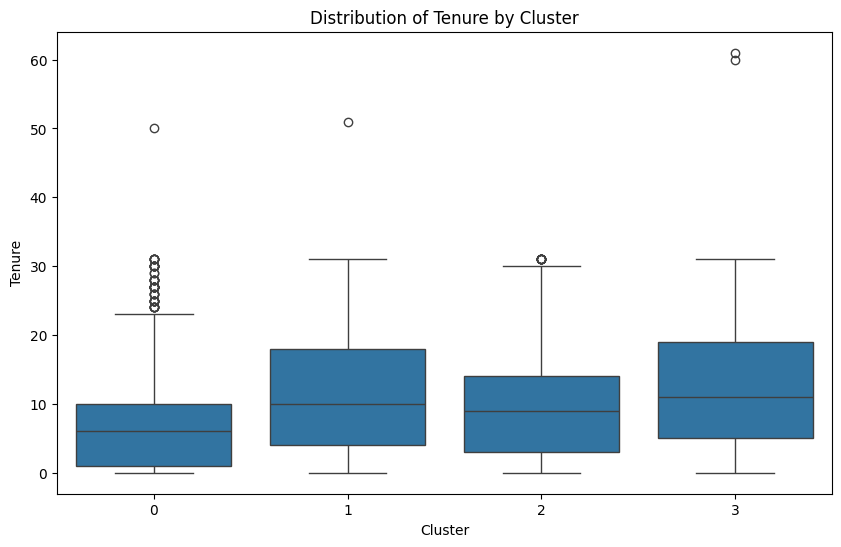

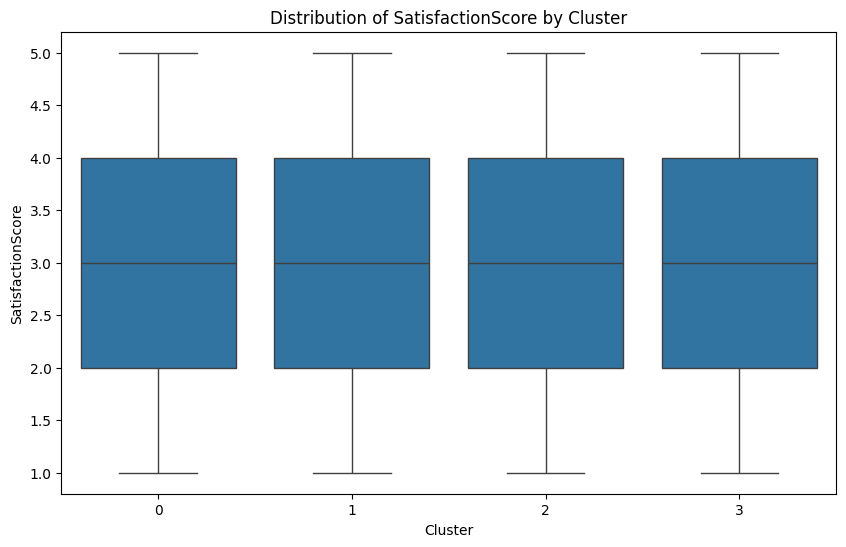

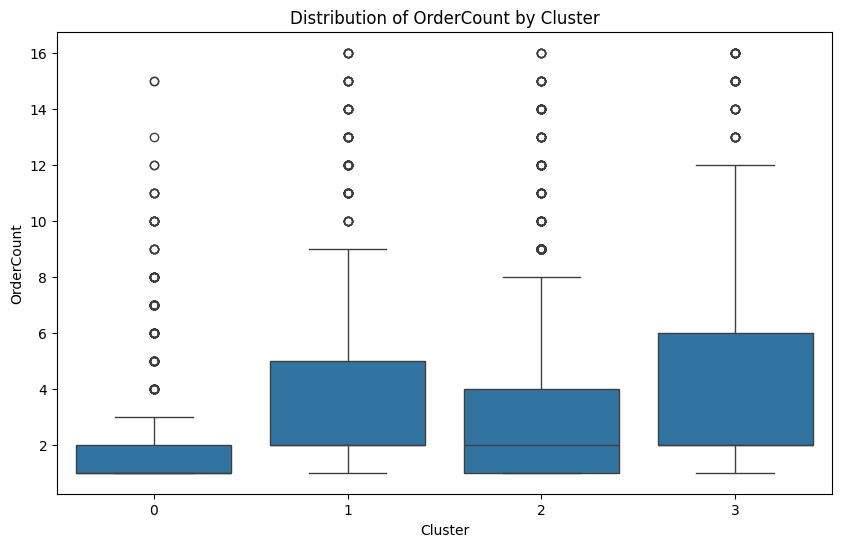

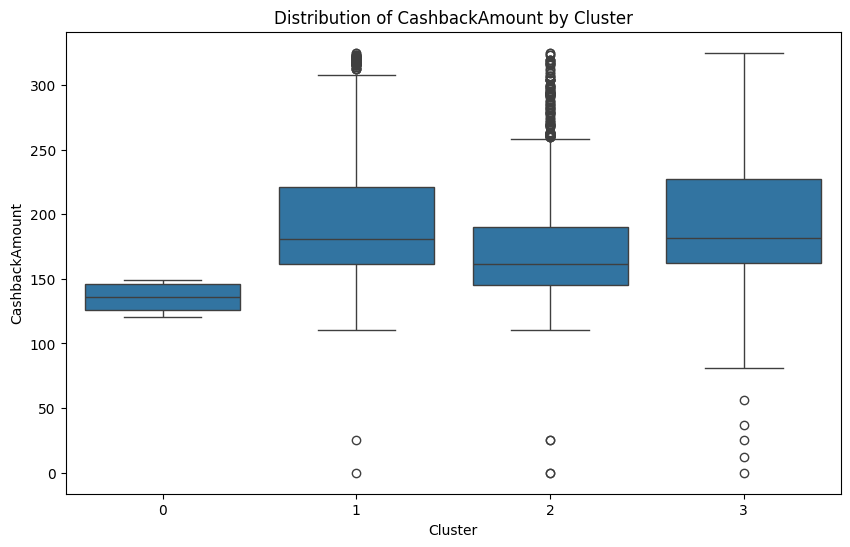

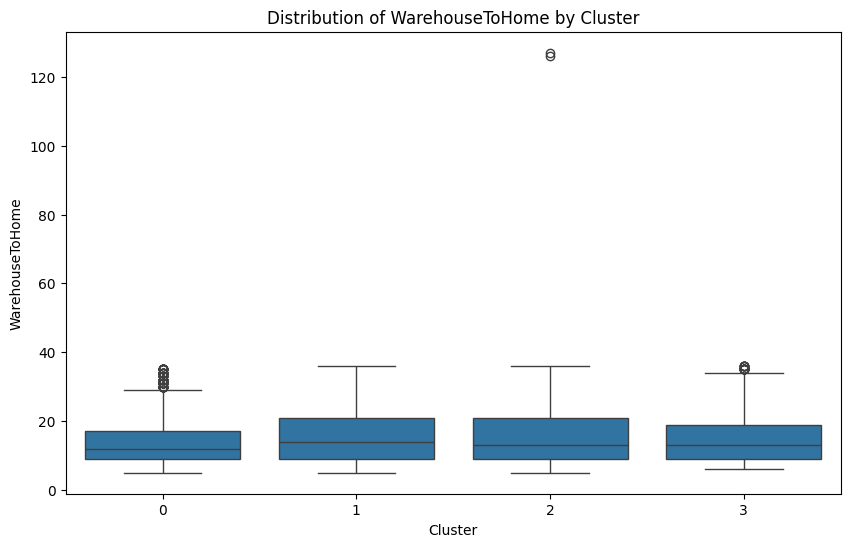

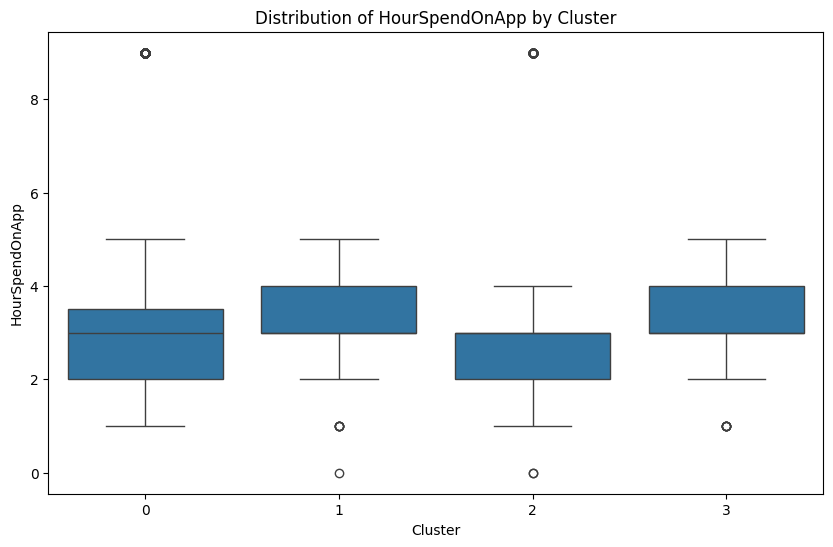

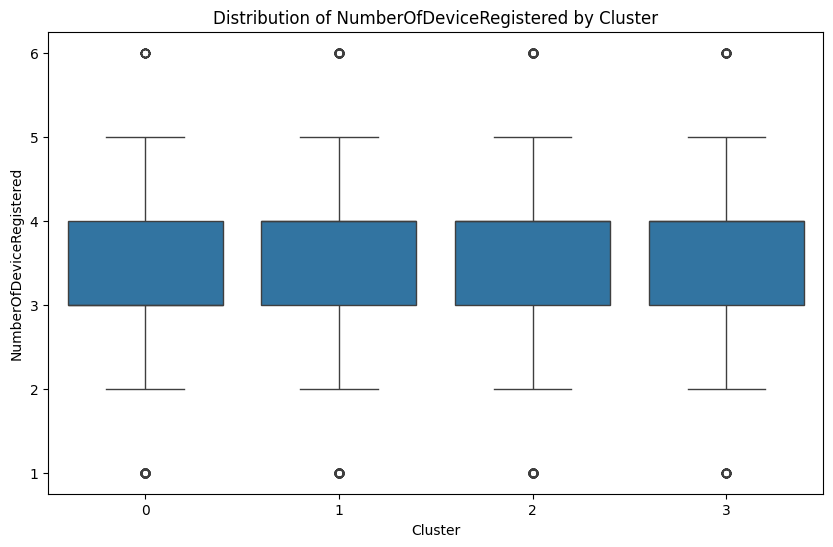

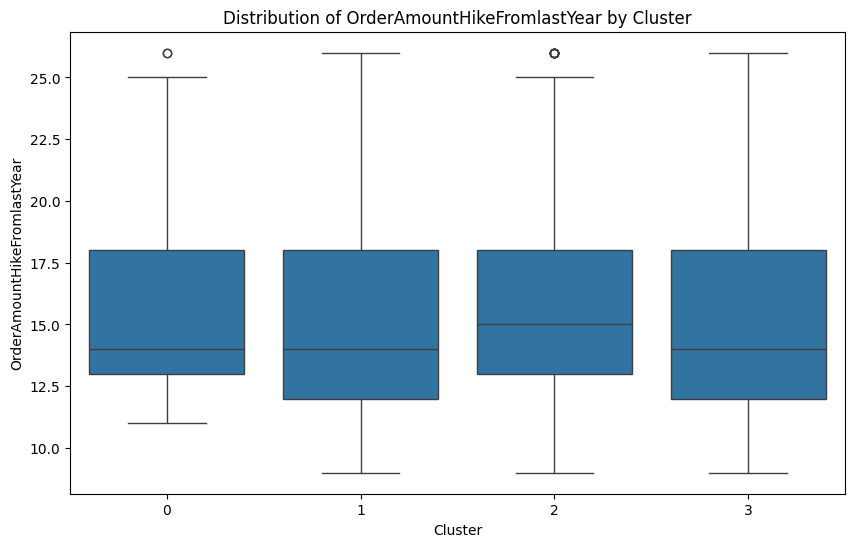

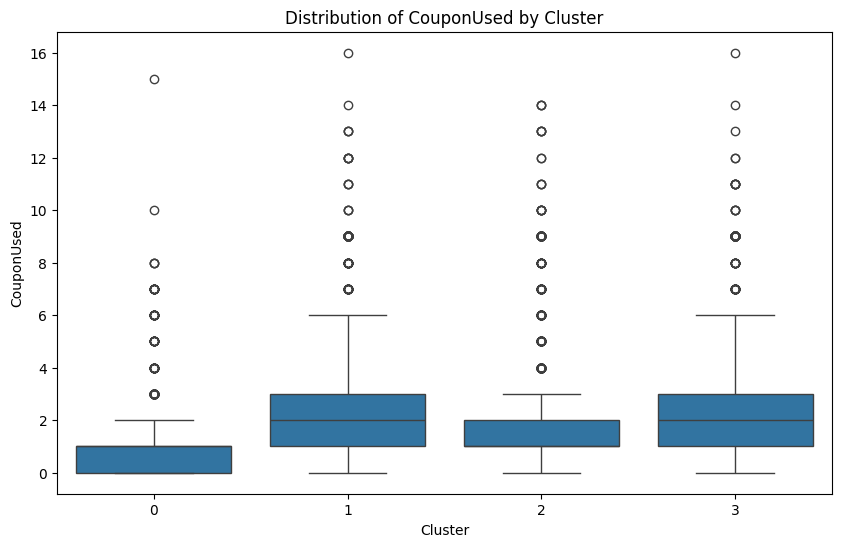

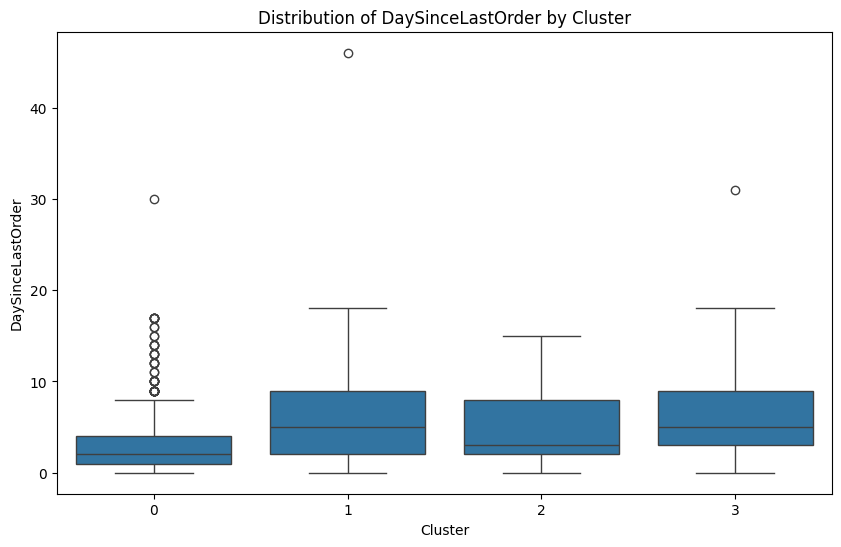

In [22]:
numerical_features_to_plot = [
    'Tenure', 'SatisfactionScore', 'OrderCount', 'CashbackAmount',
    'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
    'OrderAmountHikeFromlastYear', 'CouponUsed', 'DaySinceLastOrder'
]

for feature in numerical_features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

Create count plots for categorical features to visualize the distribution of categories within each cluster.



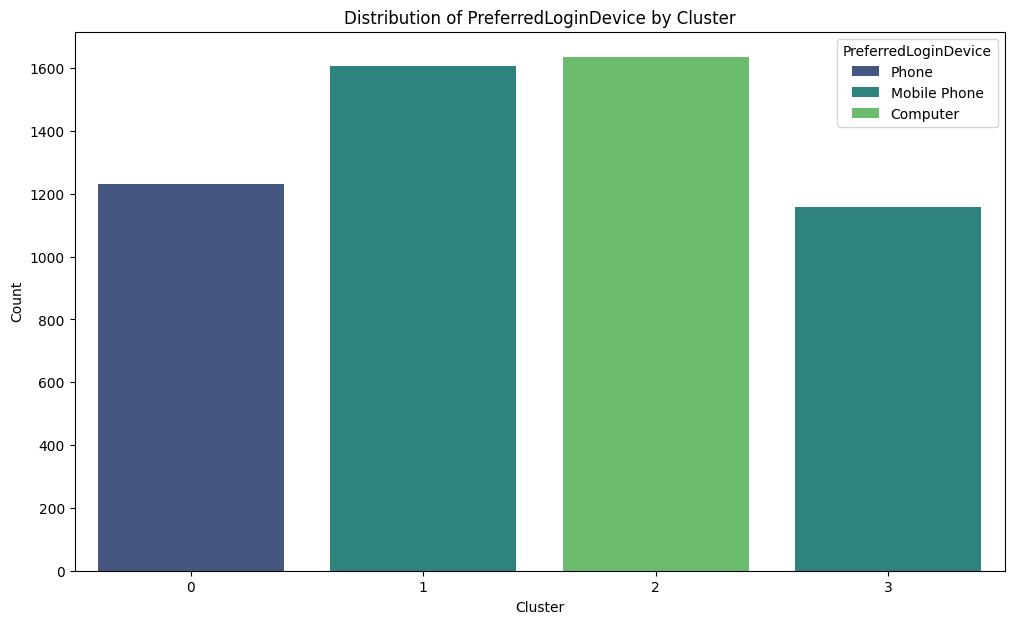

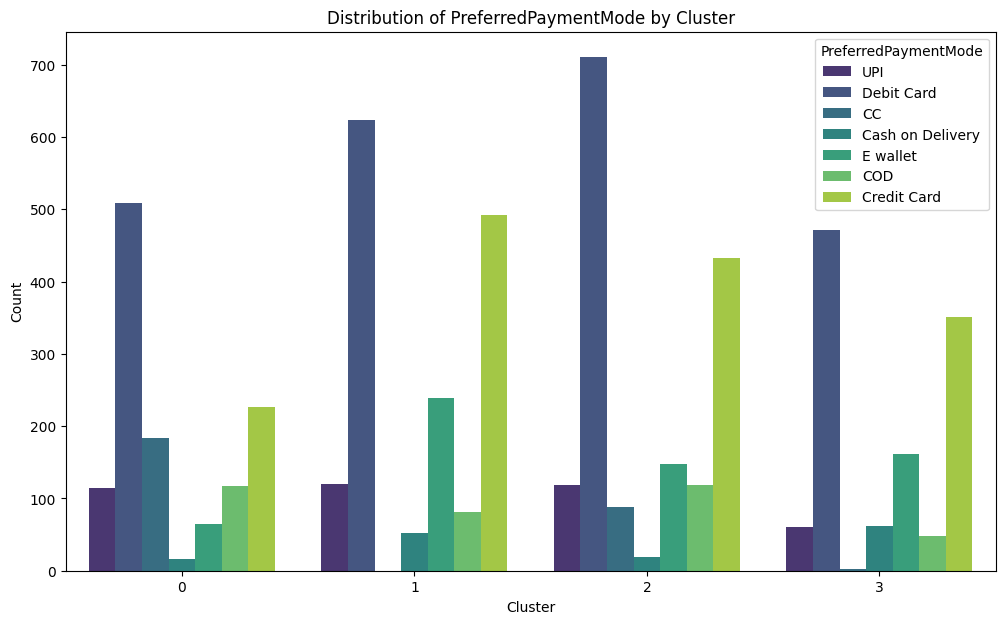

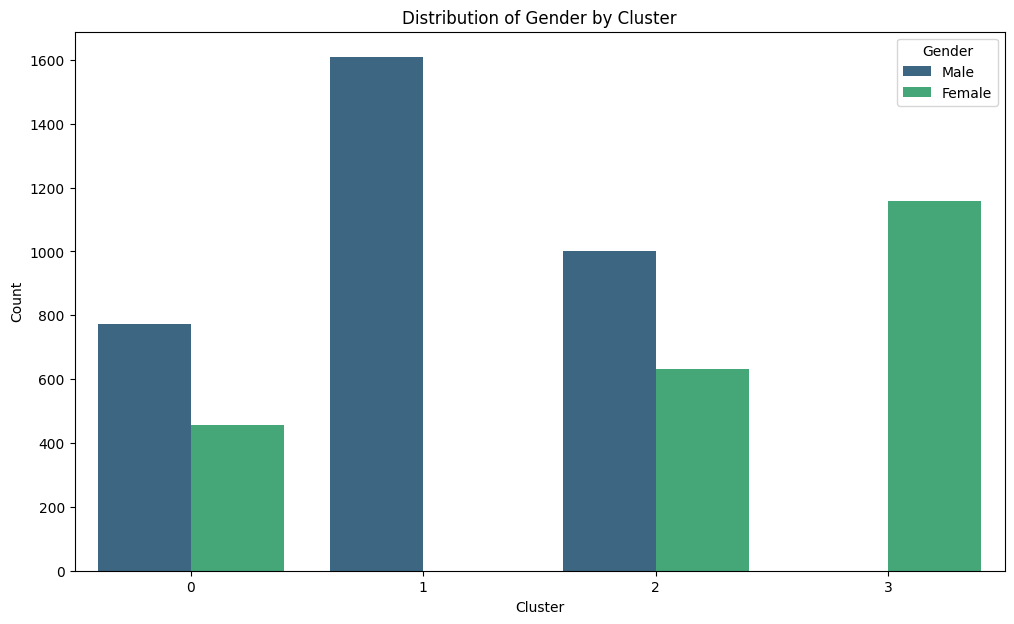

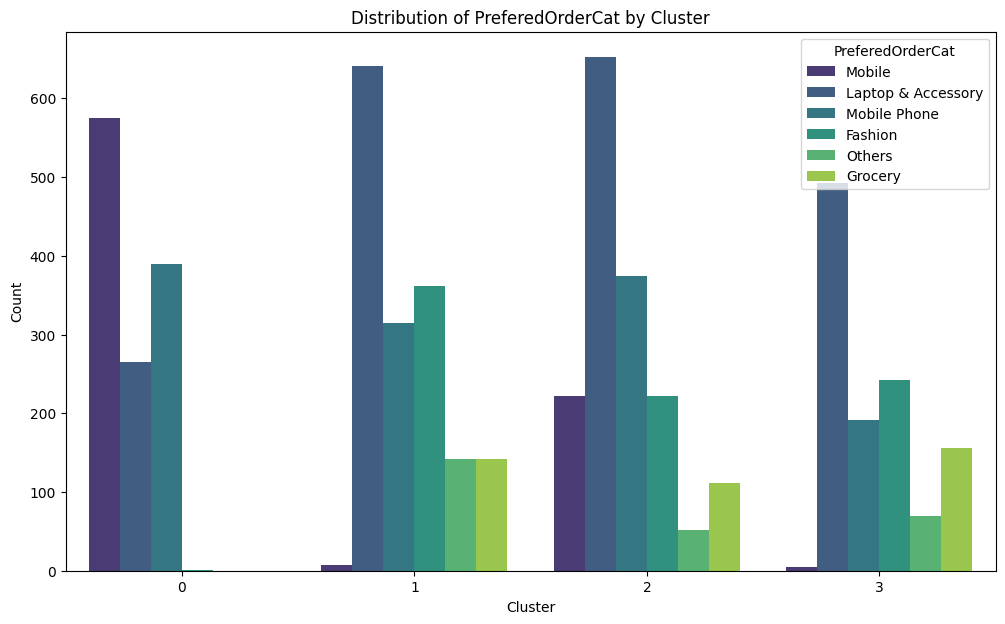

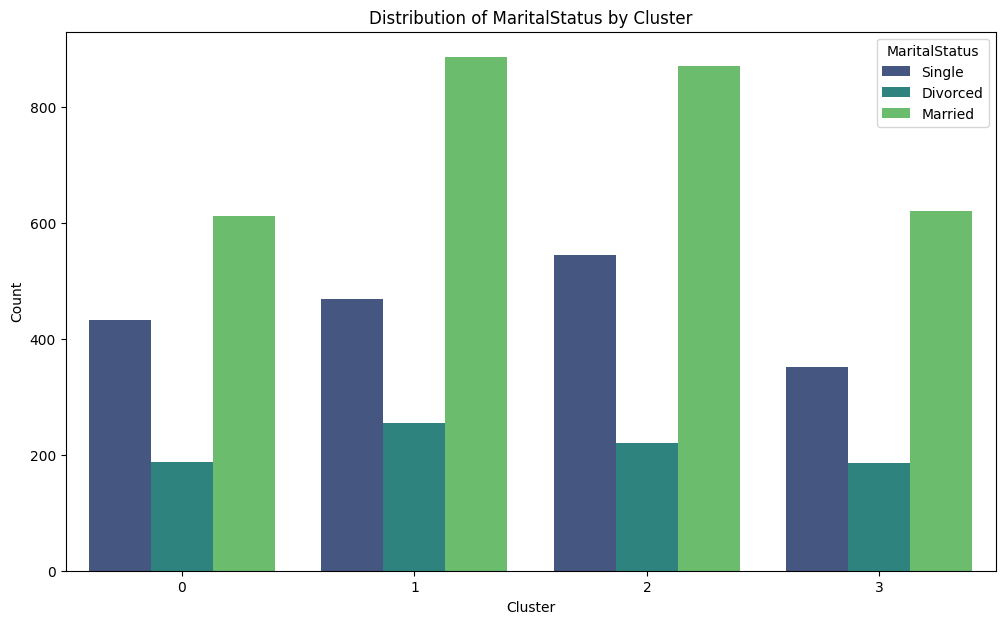

In [23]:
categorical_features_to_plot = [
    'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
    'PreferedOrderCat', 'MaritalStatus'
]

for feature in categorical_features_to_plot:
    plt.figure(figsize=(12, 7))
    sns.countplot(x='Cluster', hue=feature, data=df, palette='viridis')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=feature)
    plt.show()

## Customer Churn Prediction

In [24]:
# Separate features (X) and the target variable (y)
X = df.drop(['CustomerID', 'Churn', 'Cluster', 'DeliveryBin'], axis=1)
y = df['Churn']

In [25]:
# Identify numerical and categorical columns for preprocessing for the model
numerical_columns = X.select_dtypes(include=['number']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Create a preprocessor for scaling numerical and one-hot encoding categorical features
preprocessor_model = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
    )

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline for preprocessing and model training
# Using RandomForestClassifier as a robust choice
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_model),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

print("\n--- Churn Prediction Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Churn Prediction Model Evaluation ---
Accuracy: 0.96
ROC AUC Score: 0.98

Confusion Matrix:
[[1397   17]
 [  58  217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1414
           1       0.93      0.79      0.85       275

    accuracy                           0.96      1689
   macro avg       0.94      0.89      0.91      1689
weighted avg       0.95      0.96      0.95      1689



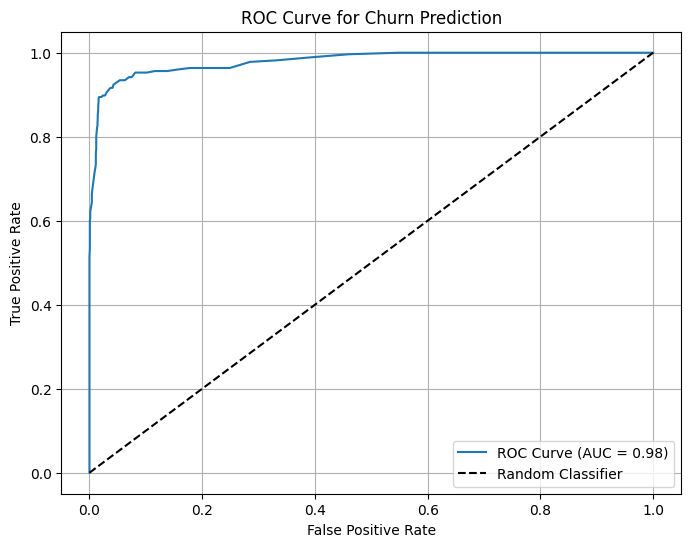

In [27]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Churn Prediction')
plt.legend()
plt.grid(True)
plt.show()

## Analysis of the Prediction Model

the churn prediction model shows strong performance. Key takeaways from the evaluation include:

* High Overall Accuracy: The model correctly predicts churn or no churn for a large percentage of customers.
Excellent.

* Ability to Distinguish: The high ROC AUC score indicates the model is very good at separating churned from non-churned customers.

* Good Precision for Churn: When the model predicts churn, it's usually correct.

* Reasonable Recall for Churn: The model identifies a good portion of the actual churned customers, although there's still a possibility of missing some.

* Low False Positives: The model doesn't incorrectly flag many active customers as churn risks.

In summary, the model is a valuable tool for identifying potential churners, although continuous monitoring and potential fine-tuning could further improve its ability to capture all churning customers.

In [28]:
# Identify high-risk customers from the entire dataset
df['Churn_Probability'] = pipeline.predict_proba(X)[:, 1]
high_risk_customers = df[df['Churn_Probability'] >= 0.75].sort_values(by='Churn_Probability', ascending=False)
print("\n--- Top 10 High-Risk Customers ---")
print(high_risk_customers[['CustomerID', 'Churn_Probability', 'Tenure', 'SatisfactionScore', 'DaySinceLastOrder', 'Complain', 'Churn']].head(10))


--- Top 10 High-Risk Customers ---
      CustomerID  Churn_Probability  Tenure  SatisfactionScore  \
1808       51809               1.00     0.0                  1   
338        50339               1.00     0.0                  2   
253        50254               0.99     0.0                  2   
3697       53698               0.99     1.0                  2   
1111       51112               0.99     0.0                  5   
3401       53402               0.99     1.0                  5   
3378       53379               0.99     1.0                  4   
5492       55493               0.99     1.0                  1   
4448       54449               0.99     1.0                  4   
4022       54023               0.99     1.0                  1   

      DaySinceLastOrder  Complain  Churn  
1808                0.0         1      1  
338                 0.0         1      1  
253                 4.0         1      1  
3697                8.0         1      1  
1111                2.

## Visualize churn risk distribution

Create a box plot to visualize the distribution of Churn_Probability by Cluster and then create scatter plots or binned box plots for key features vs Churn_Probability.



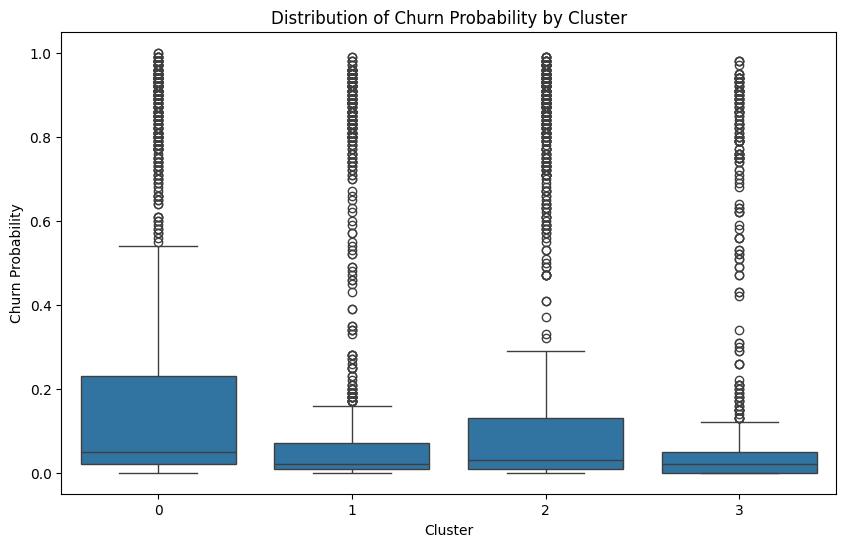

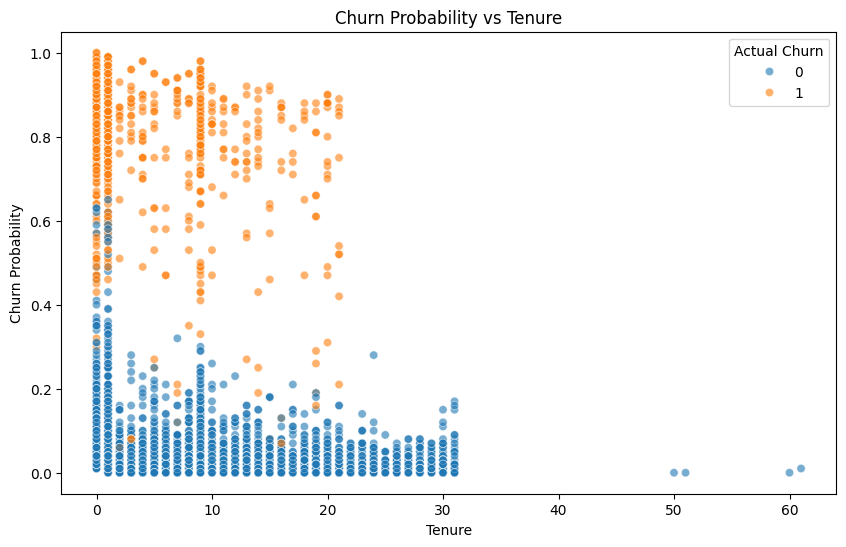

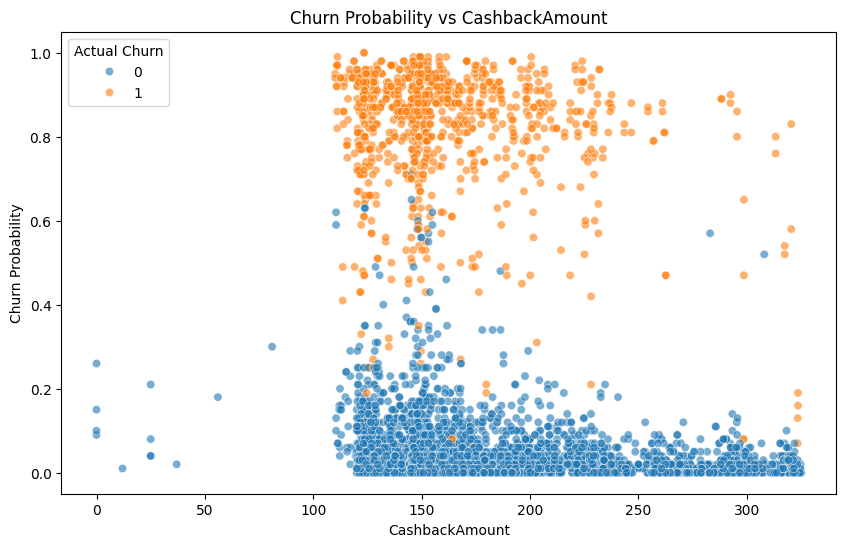

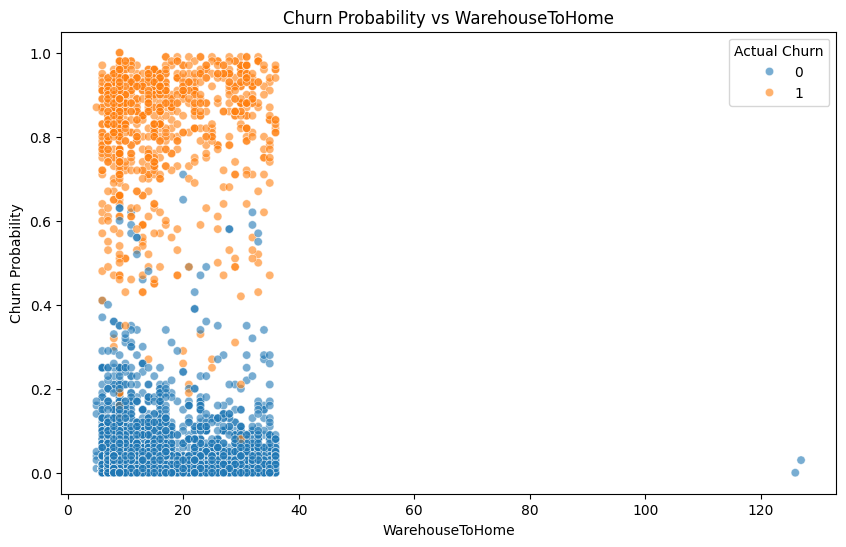

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Box plot of Churn_Probability by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Churn_Probability', data=df)
plt.title('Distribution of Churn Probability by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Probability')
plt.show()

# Visualizations for key features vs Churn_Probability
key_features = ['Tenure', 'CashbackAmount', 'WarehouseToHome']

for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='Churn_Probability', hue='Churn', data=df, alpha=0.6)
    plt.title(f'Churn Probability vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Churn Probability')
    plt.legend(title='Actual Churn')
    plt.show()


## Visualize feature importances from RandomForestClassifier

Create a bar chart to visualize the top 10 feature importances for churn prediction.


--- Feature Importance for Churn Prediction ---
                        feature  importance
0                        Tenure    0.204360
12               CashbackAmount    0.094684
2               WarehouseToHome    0.069531
7                      Complain    0.060562
11            DaySinceLastOrder    0.058822
6               NumberOfAddress    0.057165
8   OrderAmountHikeFromlastYear    0.055089
5             SatisfactionScore    0.045554
4      NumberOfDeviceRegistered    0.033993
10                   OrderCount    0.031940


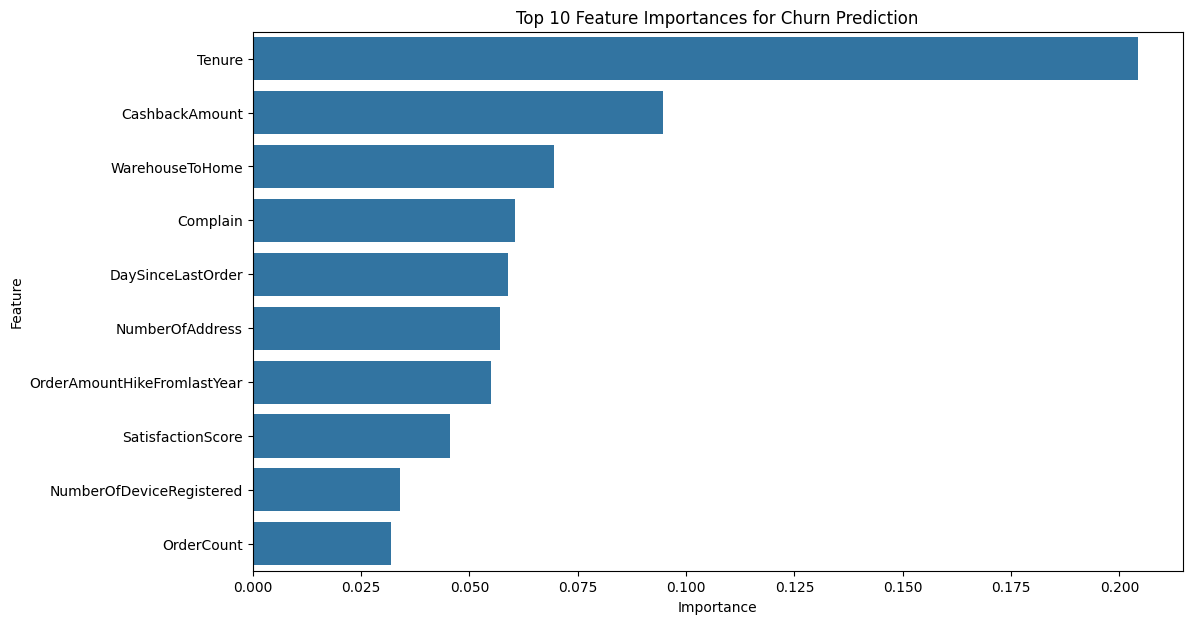

In [30]:
# Get feature names after one-hot encoding
ohe_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_feature_names = numerical_columns + ohe_feature_names.tolist()

if hasattr(pipeline.named_steps['classifier'], 'feature_importances_'):
    importances = pipeline.named_steps['classifier'].feature_importances_
    feature_importances_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
    feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)
    print("\n--- Feature Importance for Churn Prediction ---")
    print(feature_importances_df.head(10))

    plt.figure(figsize=(12, 7))
    sns.barplot(x='importance', y='feature', data=feature_importances_df.head(10))
    plt.title('Top 10 Feature Importances for Churn Prediction')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

## Visualize key performance indicators (kpis)

Calculate and visualize the overall churn rate and churn rate by cluster, and the average cashback amount by cluster to define and visualize relevant KPIs.


Overall Churn Rate: 0.17

Churn Rate by Cluster:
   Cluster     Churn
0        0  0.224208
1        1  0.136816
2        2  0.198286
3        3  0.110631


/tmp/ipython-input-31-2657390050.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Churn', data=churn_rate_by_cluster, palette='viridis')


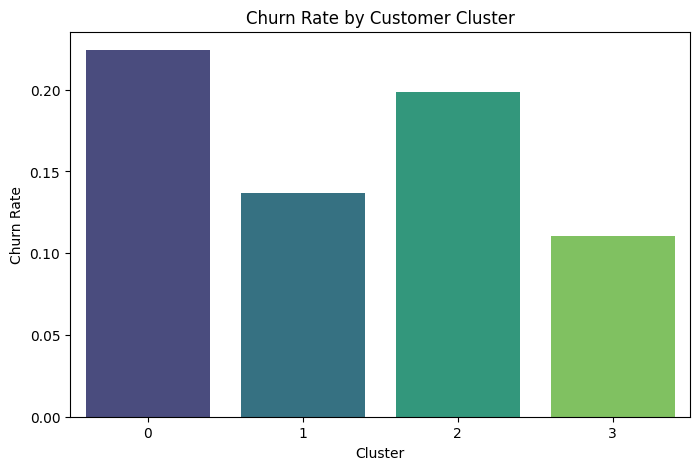


Average Cashback Amount by Cluster:
   Cluster  CashbackAmount
0        0      135.680366
1        1      197.728414
2        2      173.538556
3        3      198.127779


/tmp/ipython-input-31-2657390050.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='CashbackAmount', data=avg_cashback_by_cluster, palette='viridis')


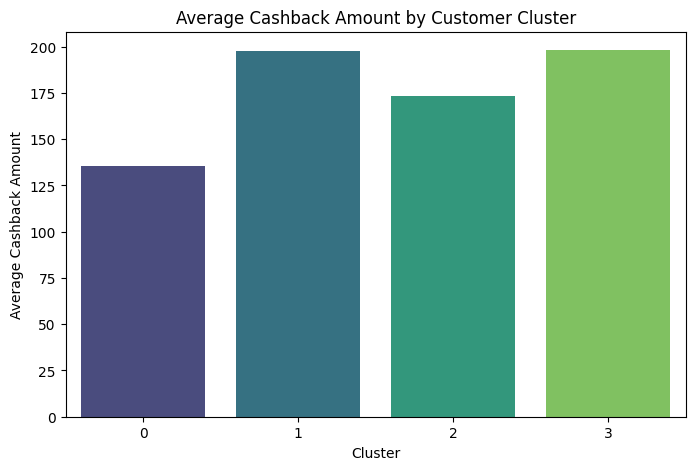

In [31]:
# 1. Calculate the overall churn rate
overall_churn_rate = df['Churn'].mean()
print(f"Overall Churn Rate: {overall_churn_rate:.2f}")

# 2. Calculate churn rate by cluster
churn_rate_by_cluster = df.groupby('Cluster')['Churn'].mean().reset_index()
print("\nChurn Rate by Cluster:")
print(churn_rate_by_cluster)

# 3. Create a bar chart to visualize churn rate by cluster
plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Churn', data=churn_rate_by_cluster, palette='viridis')
plt.title('Churn Rate by Customer Cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.show()

# 4. Calculate the average 'CashbackAmount' for each cluster
avg_cashback_by_cluster = df.groupby('Cluster')['CashbackAmount'].mean().reset_index()
print("\nAverage Cashback Amount by Cluster:")
print(avg_cashback_by_cluster)

# 5. Create a bar chart to visualize the average cashback amount by cluster
plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='CashbackAmount', data=avg_cashback_by_cluster, palette='viridis')
plt.title('Average Cashback Amount by Customer Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Cashback Amount')
plt.show()

## Tailored Marketing Strategies and Sales Growth Opportunities

Based on the customer segmentation and churn prediction analysis, we can develop targeted strategies to retain valuable customers and drive sales growth.

### Strategies for Loyal Customers (Cluster 3 and 4)

These clusters exhibit high tenure, high satisfaction, and low churn rates. They are valuable assets and the focus should be on retention and maximizing their lifetime value.

*   **Personalized Offers and Rewards:** Offer exclusive discounts, early access to new products, or loyalty points programs to make them feel appreciated and encourage continued engagement.
*   **VIP Treatment:** Provide dedicated customer support lines or personalized shopping experiences.
*   **Gather Feedback:** Actively solicit feedback to understand their needs and preferences better and identify areas for further improvement.
*   **Referral Programs:** Encourage them to refer friends and family with attractive incentives.

### Strategies for At-Risk Customers (Potentially parts of Cluster 1 and 2 based on churn probability)

While the clustering didn't explicitly identify an "At-Risk" cluster, the churn prediction model can pinpoint individual customers with a high probability of churning. These customers require immediate attention.

*   **Proactive Outreach:** Reach out to high-risk customers with personalized messages or offers to address their concerns and prevent churn.
*   **Incentivize Re-engagement:** Offer special discounts or incentives to encourage them to make another purchase.
*   **Address Complaints:** If a customer has a history of complaints (as indicated by the 'Complain' feature importance), prioritize resolving their issues quickly and effectively.
*   **Win-back Campaigns:** For customers who have already churned, implement targeted campaigns with compelling offers to encourage them to return.

### Strategies for Other Segments (Cluster 1 and 2)

These clusters have varying characteristics and may require different approaches.

*   **Analyze Cluster-Specific Traits:** Examine the `cluster_summary` to identify the defining characteristics of Clusters 1 and 2 (e.g., preferred devices, payment methods, order categories) and tailor marketing messages accordingly.
*   **Targeted Promotions:** Offer promotions relevant to their preferred order categories or payment methods.
*   **Improve Satisfaction:** If a cluster has a lower average satisfaction score, investigate the reasons and implement measures to improve their experience.

### Sales Growth Opportunities Across All Segments

*   **Cross-selling and Upselling:** Based on customer purchase history and preferences (e.g., 'PreferedOrderCat'), recommend related products or encourage upgrades.
*   **Personalized Product Recommendations:** Utilize the data to provide highly relevant product recommendations on the website, app, or through email marketing.
*   **Optimize Marketing Channels:** Based on 'PreferredLoginDevice', focus marketing efforts on the channels where customers are most active.
*   **Analyze Feature Importances:** Continuously monitor the feature importances from the churn prediction model to understand which factors are most influential in customer behavior and tailor strategies accordingly. For example, if 'CashbackAmount' is a significant factor, consider optimizing cashback offers.
*   **Leverage Customer Lifetime Value (CLTV):** Calculate or estimate the CLTV for different customer segments to prioritize marketing efforts and resource allocation.

By combining the insights from customer segmentation and churn prediction, businesses can develop more effective and personalized marketing strategies to improve customer retention and drive sustainable sales growth.

## Summary Key Findings

*   The analysis identified distinct customer clusters with varying characteristics in terms of tenure, satisfaction, order count, cashback amount, login device, payment mode, gender, preferred order category, and marital status.
*   Churn probability varies significantly across the identified customer clusters, with Cluster 1 showing the highest churn rate (22.4%) and Cluster 3 the lowest (11.1%).
*   Key features influencing churn prediction include Tenure, Cashback Amount, and Warehouse to Home distance.
*   Hypothetical data suggests that Personalized Product Recommendations could have a higher conversion rate (15%) compared to Bundled Offers (10%), Recently Viewed Items (8%), and Top Selling Products (5%).
*   The overall churn rate in the dataset is 17%.
*   Customers in clusters with lower average cashback amounts (like Cluster 1, \$135.68) tend to have higher churn rates, while those with higher average cashback amounts (like Clusters 2 and 3, $197.73 and \$198.13 respectively) show lower churn rates.
